In [1]:
!pip install dipy

     |████████████████████████████████| 8.1MB 43.0MB/s 


In [2]:
!pip install fury

     |████████████████████████████████| 153kB 16.8MB/s 
     |████████████████████████████████| 48.9MB 54kB/s 


In [3]:
from dipy.data import fetch_sherbrooke_3shell
fetch_sherbrooke_3shell()

Download Progress: [########################################] 100.00%  of 0.01 MB

({'HARDI193.bval': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bval',
   'e9b9bb56252503ea49d31fb30a0ac637'),
  'HARDI193.bvec': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bvec',
   '0c83f7e8b917cd677ad58a078658ebb7'),
  'HARDI193.nii.gz': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.nii.gz',
   '0b735e8f16695a37bfbd66aab136eb66')},
 '/root/.dipy/sherbrooke_3shell')

In [0]:
from os.path import expanduser, join
home = expanduser('~')

In [0]:
dname = join(home, '.dipy', 'sherbrooke_3shell')

In [6]:
fdwi = join(dname, 'HARDI193.nii.gz')

print(fdwi)

fbval = join(dname, 'HARDI193.bval')

print(fbval)

fbvec = join(dname, 'HARDI193.bvec')

print(fbvec)

/root/.dipy/sherbrooke_3shell/HARDI193.nii.gz
/root/.dipy/sherbrooke_3shell/HARDI193.bval
/root/.dipy/sherbrooke_3shell/HARDI193.bvec


In [0]:
from dipy.io.image import load_nifti
data, affine, img = load_nifti(fdwi, return_img=True)


In [8]:
img

In [9]:
print(data.shape)

(128, 128, 60, 193)


In [10]:
print(img.header.get_zooms()[:3])

(2.0, 2.0, 2.0)


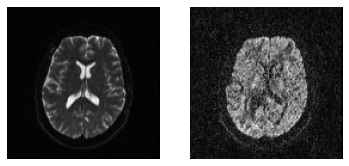

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

axial_middle = data.shape[2] // 2
plt.figure('Showing the datasets')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()
plt.savefig('data.png', bbox_inches='tight')

In [0]:
from dipy.io import read_bvals_bvecs
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

In [0]:
from dipy.core.gradients import gradient_table
gtab = gradient_table(bvals, bvecs)

In [14]:
gtab

In [15]:
print(gtab.info)

None


In [16]:
print(gtab.bvals)

[   0. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500.
 3500. 3500. 3500. 3500. 3500. 3500. 3500. 3500. 35

In [17]:
print(gtab.bvecs[:10, :])

[[ 0.          0.          0.        ]
 [ 0.999979   -0.00504001 -0.00402795]
 [ 0.          0.999992   -0.00398794]
 [-0.0257055   0.653861   -0.756178  ]
 [ 0.589518   -0.769236   -0.246462  ]
 [-0.235785   -0.529095   -0.815147  ]
 [-0.893578   -0.263559   -0.363394  ]
 [ 0.79784     0.133726   -0.587851  ]
 [ 0.232937    0.931884   -0.278087  ]
 [ 0.93672     0.144139   -0.31903   ]]


In [0]:
S0s = data[:, :, :, gtab.b0s_mask]

In [19]:
print(S0s.shape)

(128, 128, 60, 1)


In [0]:


from dipy.io.image import save_nifti
save_nifti('HARDI193_S0.nii.gz', S0s, affine)



from dipy.io.image import save_nifti
save_nifti('HARDI193_S0.nii.gz', S0s, affine)



In [0]:
import numpy as np
from dipy.data import get_fnames
from dipy.align.imwarp import SymmetricDiffeomorphicRegistration
from dipy.align.metrics import SSDMetric, CCMetric, EMMetric
import dipy.align.imwarp as imwarp
from dipy.viz import regtools


fname_moving = get_fnames('reg_o')
fname_static = get_fnames('reg_c')

moving = np.load(fname_moving)
static = np.load(fname_static)

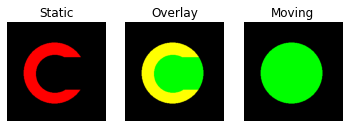

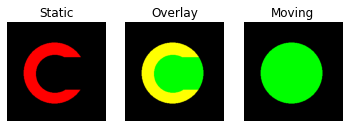

In [22]:
regtools.overlay_images(static, moving, 'Static', 'Overlay', 'Moving',
                        'input_images.png')


In [0]:
dim = static.ndim
metric = SSDMetric(dim)

In [0]:
level_iters = [200, 100, 50, 25]

sdr = SymmetricDiffeomorphicRegistration(metric, level_iters, inv_iter=50)


In [0]:
mapping = sdr.optimize(static, moving)

(array([[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     , 127.     , 127.00001, ...,   0.     , 127.     ,
         127.     ],
        [  0.     , 127.00001, 127.     , ...,   0.     , 127.     ,
         127.     ],
        ...,
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     , 127.     , 127.     , ...,   0.     , 127.     ,
         127.     ],
        [  0.     , 127.     , 127.     , ...,   0.     , 127.     ,
         127.     ]], dtype=float32),
 array([[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     , 126.87221, 126.88522, ...,   0.     , 127.     ,
         127.     ],
        [  0.     , 126.86069, 127.     , ...,   0.     , 127.     ,
         127.     ],
        ...,
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     , 127.     , 127.     , ...,   0.     ,

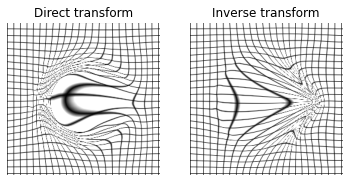

In [26]:
regtools.plot_2d_diffeomorphic_map(mapping, 10, 'diffeomorphic_map.png')

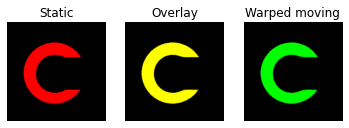

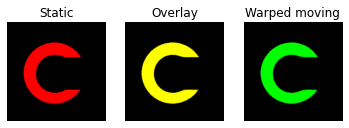

In [27]:
warped_moving = mapping.transform(moving, 'linear')
regtools.overlay_images(static, warped_moving, 'Static', 'Overlay',
                        'Warped moving', 'direct_warp_result.png')

In [0]:
def callback_CC(sdr, status):
    # Status indicates at which stage of the optimization we currently are
    # For now, we will only react at the end of each resolution of the scale
    # space
    if status == imwarp.RegistrationStages.SCALE_END:
        # get the current images from the metric
        wmoving = sdr.metric.moving_image
        wstatic = sdr.metric.static_image
        # draw the images on top of each other with different colors
        regtools.overlay_images(wmoving, wstatic, 'Warped moving', 'Overlay',
                                'Warped static')

In [29]:
from dipy.data import get_fnames
from dipy.io.image import load_nifti_data
from dipy.segment.mask import median_otsu

t1_name, b0_name = get_fnames('syn_data')
data = load_nifti_data(b0_name)

Download Progress: [########################################] 100.00%  of 1.34 MB

In [0]:
b0_mask, mask = median_otsu(data, median_radius=4, numpass=4)

In [0]:
static = b0_mask[:, :, 40]
moving = b0_mask[:, :, 38]


In [0]:
sigma_diff = 3.0
radius = 4
metric = CCMetric(2, sigma_diff, radius)

In [0]:
level_iters = [100, 50, 25]
sdr = SymmetricDiffeomorphicRegistration(metric, level_iters)
sdr.callback = callback_CC


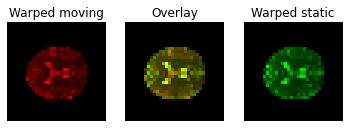

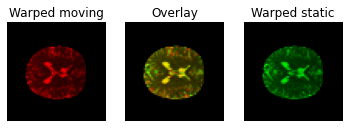

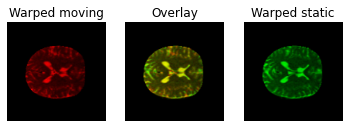

In [34]:
mapping = sdr.optimize(static, moving)

warped = mapping.transform(moving)

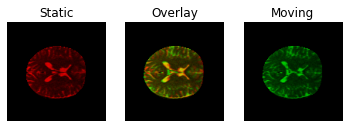

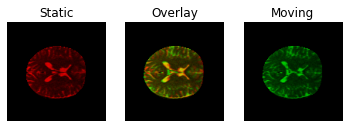

In [35]:
regtools.overlay_images(static, moving, 'Static', 'Overlay', 'Moving','t1_slices_input.png')



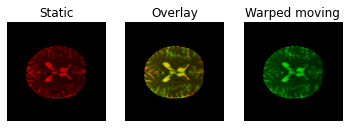

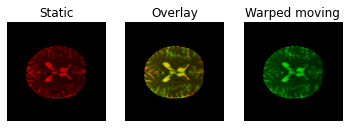

In [36]:
regtools.overlay_images(static, warped, 'Static', 'Overlay', 'Warped moving','t1_slices_res.png')


(array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
           0.      ],
        [  0.      , 126.997574, 126.99686 , ..., 127.      ,   0.      ,
         127.      ],
        [  0.      , 126.99828 , 127.      , ..., 127.      ,   0.      ,
         127.      ],
        ...,
        [  0.      , 127.      , 127.      , ..., 127.      ,   0.      ,
         127.      ],
        [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
           0.      ],
        [  0.      , 127.      , 127.      , ..., 127.      ,   0.      ,
         127.      ]], dtype=float32),
 array([[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     , 127.00001, 126.99999, ..., 127.     ,   0.     ,
         127.     ],
        [  0.     , 126.99999, 127.     , ..., 127.     ,   0.     ,
         127.     ],
        ...,
        [  0.     , 127.     , 127.     , ..., 127.     ,   0.     ,
         127.     ],
        [  0.     ,  

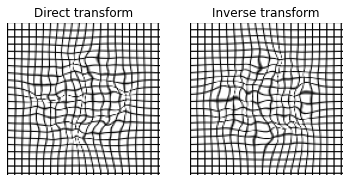

In [37]:
regtools.plot_2d_diffeomorphic_map(mapping, 5, 'diffeomorphic_map_b0s.png')